# Lab Two - Ecosystem Impacts

## *Analysis of Climate Impacts on Avian Migration*

In this lab we learn part 2 basics of Python for data analysis through utilizing the Jupyter environment to analyze data. 

You will learn how to: 


- Use datetime objects
- Manipulate datetime objects (methods of datetime objects)
- Make subplots
- Use datetime objects as an index in a Pandas dataframe
- Plot with error bars
- Create simple legends
- Continue to use indexing (boolean and normal) to look at data

By the end of this lab you should be able to: read in and create a datetime index for a Pandas dataframe, plot error bars, make subplots


Additional materials for reading: 
- More information on datetime objects: https://docs.python.org/3.7/library/datetime.html
- More information on datetime string formats: http://strftime.org/
- More information on subplots https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html
- Igual & Seguí Chapter 2: Sections 2.6 to the end of Chapter 2

## *Review of Lab 1*

Last time we learned how to read in simple formatted csv files into pandas dataframes and manipulate those dataframes to plot. We also learned about boolean indexing. 

### Clarification from Lab 1: 
The methods we learned `DataFrame.at[]` vs `DataFrame.loc[]` differ through the amount of values you access, `.at` accesses a single value at a time while `.loc` can select rows / columns.

Pandas is named such as a portmanteau of panels and data. 

### Part A: Are there any questions about the homework or about Lab1? 


----



### Part B: Data visualization activity! 

The data set we used in Lab 1 is one of the highlighted datasets in the National Climate Asssesment (3rd edition circa 2014). The fourth edition part 1 came out in 2017 (https://science2017.globalchange.gov/chapter/front-matter-about/). 

Please go to this link and scroll down to Figure 2.2 / 2.3. These are interactive, feel free to click around.
    https://nca2014.globalchange.gov/report/our-changing-climate/observed-change
    
Then go to the main source of this figure by Huber and Knutti, 2011 and look at Figure 3. 
    https://www.nature.com/articles/ngeo1327.pdf.  
    
Pair up with your neighbor and discuss: 

- How are these figures presented differently? 
- What is important about how the 3rd edition of the NCA presented the same data? 

----


## *Part 1 - Importing New Temperature Dataset and Learning About Datetime Objects*

In this lab we will use mulitple datasets, one of which is similarly formatted to that in Lab 1. Instead of global temperature average anomalies we have the temperature anomalies for the lower 48 United States (excluding Hawaii & Alaska) and instead of by year, we have by month. 

Below we import the required packages in this lab and this dataset.

### *Part 1. A - Importing More Complex Datasets*

In [1]:
import numpy as np               #for handling numbers w/ precision
import pandas as pd              #for handling dataframes
import matplotlib.pyplot as plt  #for plotting of datasets

import datetime as dt            #NEW IN THIS LAB - Importing the package datetime for 
                                 #datetime manipulation
import matplotlib.dates as mdt   #for manipulation of dates in matplotlib 

# Setting up environment so plots will be placed in the Notebook.
%matplotlib inline



In [2]:
# Reading in NEW dataset of temperature anomaly data for lower 48 US States.
temp_var_us = pd.read_csv('./Data/us_avgtemp_bymonth.txt', header = 4)

**Dataset description**: 

Data source:
 
  https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/ytd/12/1880-2017
    
Provided by NOAA National Center for Environmental Information

Global temperature anomaly data come from the Global Historical Climatology 
Network-Monthly (GHCN-M) data set and International Comprehensive Ocean-Atmosphere 
Data Set (ICOADS), which have data from 1880 to the present. 

This data is the timeseries of the lower 48 temperature anomalies calculated with respect to 
the 20th century average.

In [3]:
# Let's look at what we just imported - can you remember the command for 
# looking at the first 5 rows of a dataframe?

#INPUT COMMAND BELOW TO PRINT OUT FIRST FIVE ROWS OF temp_var_us








'

''

'''

''''

'''

''

'

Great - did you notice anything different about the lefthand column called date now? It looks like years followed by months? What an annoying format. This is pretty common in climate/space data to have interesting date/time formats. One of the BEST packages Python has created to deal with this problem is the datetime package. We imported this previously.


### *Part 1. B - Datetime Objects*

But what IS a datetime object? Let's see! Evaluate and explore the following cells until you get to Part 2.

In [4]:
# Please evaluate the following lines,
# to DEFINE and CREATE a datetime object manually.

# Inputs are year, month, day, then hour, minute, second
test_date =  dt.datetime(2005, 2, 1)

# This can also include TIME for example
test_date_time =  dt.datetime(2005, 3, 1, 10, 9, 8)

# These are in 24 hour format time so 0 - 24 are hours, not AM / PM.

In [5]:
# You can find out different attributes of the datetime object using the following commands.
# For eaxmple,

print(test_date.year, test_date.month, test_date.day)


2005 2 1


In [6]:
print(test_date_time.hour, test_date_time.minute, test_date_time.second)

10 9 8


In [7]:
# Note what happens if you haven't DEFINED - it does not 
# result in an error, but rather prints zero
print(test_date.minute, test_date.hour)

0 0


In [8]:
# There are also some additional useful effects like:

test_time_delta = test_date_time - test_date
print(test_time_delta)
print(type(test_time_delta))


28 days, 10:09:08
<class 'datetime.timedelta'>


In [9]:
# That is a time delta object and results when subtracting two datetime objects. 
# You can do things to time deltas like:

print(test_time_delta.total_seconds())
#the amount of seconds between the two times


2455748.0


In [10]:
# We could have ALSO defined a datetime from a string using the strip time method, for example

test_date_string = '2005-10-2'

# format is datetime.strptime(date_string, format) 
new_date_from_string = dt.datetime.strptime(test_date_string, '%Y-%m-%d')
# More format codes can be found in a link above under additional reading above.



In [11]:
# Let's see what our new date looks like

print(new_date_from_string)
print(type(new_date_from_string))
#note the lack of time

2005-10-02 00:00:00
<class 'datetime.datetime'>


When you reach here, please put your name horizontal.

## Part 2 - Using Datetimes as Indexing in Pandas Dataframes

Now that we've learned about datetime objects lets go back to our imported data. One advantage of Pandas DataFrames over numpy arrays
is the indexing behaivor. You can access parts of the dataframe using the `.at` and `.loc` methods we learned before, but the first command is the index, and the second command is the column. See how this works below. 

In [12]:
# Within this cell please access using the .loc command into the Pandas dataframe temp_var_us.
# Print out at the index 2 and all the columns - work with your neighbor.

#ENTER COMMAND BELOW








'

''

'''

''''

'''

''

'


Wouldn't it be nice to instead be able to ask for the data at a certain date? Or a certain range of dates?
To do that now we would have to use boolean indexing, when a date == a certain number then get the values. 
What if instead of the auto index, we could make the DATES the index???

In [13]:
# Note how its a RangeIndex
print(temp_var_us.index)


RangeIndex(start=0, stop=1476, step=1)


In [14]:
# You can also do the following if you want an array. 
print(temp_var_us.index.values)

[   0    1    2 ... 1473 1474 1475]


Pandas has a swanky function called pd.to_datetime.

More info here https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

Most of the time this a good go to function, but it can be a little tricky. Sometimes you will need
to convert data differently to datetime objects. But let's see what we can do with this.


In [15]:
# Here we are creating a new variable: temp_var_us_dates

# We have set the infer command to False because we are TELLING it what format
# to use.
temp_var_us_dates = pd.to_datetime(temp_var_us['Date'], infer_datetime_format=False, 
                                   format='%Y%m')

In [16]:
#in this cell go ahead and print out the first five entries of temp_var_us_dates

#ENTER PRINT COMMAND BELOW FOR FIRST FIVE ROWS





Our variable `temp_var_us_dates` is a Pandas Series that is storing data types of datetime objects. Each datetime in the Series has all of the functionality and attributes that the datetimes we created earlier have. 

Next, we will set Series of datetimes to be the `Index` of our DataFrame.

In [17]:
temp_var_us.index = temp_var_us_dates

# And now let's look at the values
temp_var_us.head()


,Date,Value,Anomaly
Date,,,
1895-01-01,189501,26.69,-3.43
1895-02-01,189502,26.60,-7.22
1895-03-01,189503,39.97,-1.53
1895-04-01,189504,52.90,1.85
1895-05-01,189505,59.94,-0.26


In [18]:
# And looking at the index now.
print(temp_var_us.index)

DatetimeIndex(['1895-01-01', '1895-02-01', '1895-03-01', '1895-04-01',
               '1895-05-01', '1895-06-01', '1895-07-01', '1895-08-01',
               '1895-09-01', '1895-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=1476, freq=None)


In [19]:
# We also have enabled all these cool methods
# that datetime allowed
print(temp_var_us.index.month)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='Date', length=1476)


In [20]:
# We can use .loc to get the values at 2006, January

# NOTICE HERE that is AUTO assumed the day is the first of the month
# or the equivalent of 0 for datetime days

print(temp_var_us.loc[dt.datetime(2006, 1, 1), :])

Date       200601.00
Value          38.93
Anomaly         8.81
Name: 2006-01-01 00:00:00, dtype: float64


In [21]:
# Note: Pandas will attempt to infer a string as a datetime if the index of the 
# DataFrame is a DatetimeIndex.

print(temp_var_us.loc['2006, 1, 1', :])
print(temp_var_us.loc['2006-1-1', :])

Date       200601.00
Value          38.93
Anomaly         8.81
Name: 2006-01-01 00:00:00, dtype: float64
Date       200601.00
Value          38.93
Anomaly         8.81
Name: 2006-01-01 00:00:00, dtype: float64


## *Part 3 - Plotting Datetime Indexed Pandas Dataframes and Error*

What if we want to compare mulitple datasets? In Assignment 1, you did this with the land and ocean datasets. What if you have different types of data? Let's give this a shot! Please run the following cell.

### *Part 3. A - Reading in New Data*

**Data Summary Source**

This first dataset is the average wintering location for North American
bird ranges over the last 40 years since 1966.

https://www.epa.gov/climate-indicators/climate-change-indicators-bird-wintering-ranges

Original report and compilation can be found at the Audobon Society website
http://web4.audubon.org/bird/bacc/techreport.html each winter (mid Dec - early January) 
the Audobon society collect bird count and location of wintering habitats


The second dataset represents the bird species that went into the previous time series
analysis with each species and summary data over previous 40 years.

In [22]:
bird_range_avg = pd.read_csv('./Data/bird_ranges_40yavg.csv', 
                             header=6)



bird_species = pd.read_csv('./Data/bird_species.csv', 
                           header=2)


In [23]:
# Let's look at the data we just imported. Write your favorite command to review the 
# bird_range_avg dataset - 



In [24]:
#let's also look at the columns of the bird_species dataset

print(bird_species.columns)





Index(['Species', 'Scientific_name', 'Habitat Guild (3 classes)',
       'Habitat Guild (5 classes)', 'Feeder use',
       'Mean latitude (40-year ave from regression)',
       'Latitudinal distance moved (miles)', 'Lat. direction moved',
       'F-value latitude slope', 'p-value slope',
       'Mean dist. from coast (40-yr ave. from regression)',
       'Change in mean dist. from coast (miles)', 'Shifted inland or to coast',
       'F-value slope dist. to coast', 'p-value slope dist. to coast',
       '# state or province strata',
       '40-year Median Trend (% change per year)', '95% LCI Trend',
       '95% UCI Trend', '% of hemispheric range in CBC survey area'],
      dtype='object')


### *Part 3. B Convert the bird_range_avg index to Datetime Objects*

Specify the datetime format to be a 4-digit year (replace ?? with the correct format string). 

In [25]:
bird_range_avg.index = pd.to_datetime(bird_range_avg['year'], 
                                      infer_datetime_format=False, 
                                      format='%Y')






Great! Now go ahead and print the index below.

In [26]:
#ENTER COMMAND BELOW TO PRINT INDEX OF bird_range_avg




Notice how all the months have set to January? This was assumed from the pd.to_datetime command, in this case the bird counts are counted in Winter (between December and January) so this is OK but keep this in mind when you have yearly data.


Notice how the dataset has the confidence interval? In lecture, we learned about errors on datasets. Let's learn how to plot these errors. 

----
### *Part 3. C Plotting with Error Bars and Datetimes*


The following sections set up a figure as we did in Lab 1 just looking at the trend line.

#### Plotting Basic Line Plot: No Error Bars

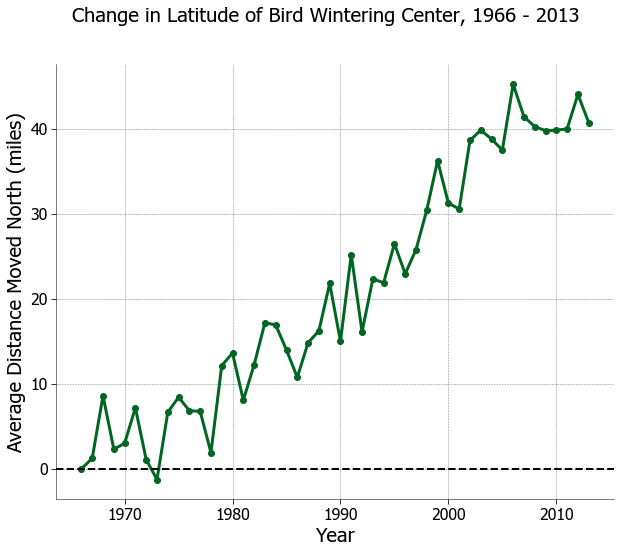

In [27]:
# Defining some properties common to all plots:
tick_lbl_size = 16
ax_lbl_size = 20
title_size=20

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Change in Latitude of Bird Wintering Center, 1966 - 2013', fontsize=title_size)

# ----------------------------------------------------------------------- #
# Note that you might receive a FutureWarning about matplotlib converters. 
# Either ignore the warning or run the following two lines in a new cell:

# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

# ----------------------------------------------------------------------- #

plt.plot(bird_range_avg.index, 
         bird_range_avg['mean distance (miles)'], 
         lw = 3.0, marker = 'o')

plt.ylabel('Average Distance Moved North (miles)', fontsize=ax_lbl_size)
plt.xlabel('Year', fontsize=ax_lbl_size)

plt.xticks(fontsize=tick_lbl_size) #make the xaxis labels larger
plt.yticks(fontsize=tick_lbl_size) #make the yaxis labels larger
plt.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

plt.grid(color='gray', linestyle='dashed') #add a grid so it's easier to tell if at zero


What can you see about the trend? 

In the next section we will plot with error bars included to represent the confidence interval.

#### Line Plot with Error Bars

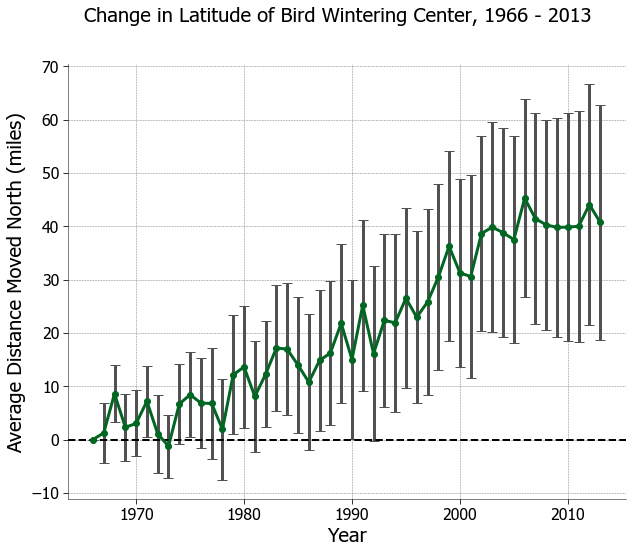

In [28]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Change in Latitude of Bird Wintering Center, 1966 - 2013', fontsize=title_size)


#more info here https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html
#https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.errorbar.html

#------------------------------------------NEW COMMAND

#the error bar plots only takes differences!

lower_diff = (bird_range_avg['mean distance (miles)'] - bird_range_avg['lower confidence (miles)']).values

upper_diff = (bird_range_avg['upper confidence (miles)'] - bird_range_avg['mean distance (miles)']).values
#notice the keyword arguments ONLY related to the error bars? 

plt.errorbar(bird_range_avg.index, bird_range_avg['mean distance (miles)'], 
             lw=3, marker='o', yerr=[lower_diff, upper_diff], 
             capsize=5, capthick=1, ecolor='#515151')
#-------------------------------------------

#this was the previous command
#plt.plot(bird_range_avg.index, bird_range_avg['mean distance (miles)'], lw = 3.0, marker = 'o')

plt.ylabel('Average Distance Moved North (miles)', fontsize=ax_lbl_size)
plt.xlabel('Year', fontsize=ax_lbl_size)

plt.xticks(fontsize=tick_lbl_size) #make the xaxis labels larger
plt.yticks(fontsize=tick_lbl_size) #make the yaxis labels larger
plt.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

plt.grid(color='gray', linestyle='dashed') #add a grid so it's easier to tell if at zero



### Stop here. Let's discuss this visualization. 

Also lets look at what is EXACTLY going on in the command to get the error bars here. 

----

'

''

'''

''''

'''

''

'











#### Line Plot with Error Envelope

Sometimes it's convenient (especially when you have a dense plot) to present the confidence or range as an envelope. The following section does just that. 

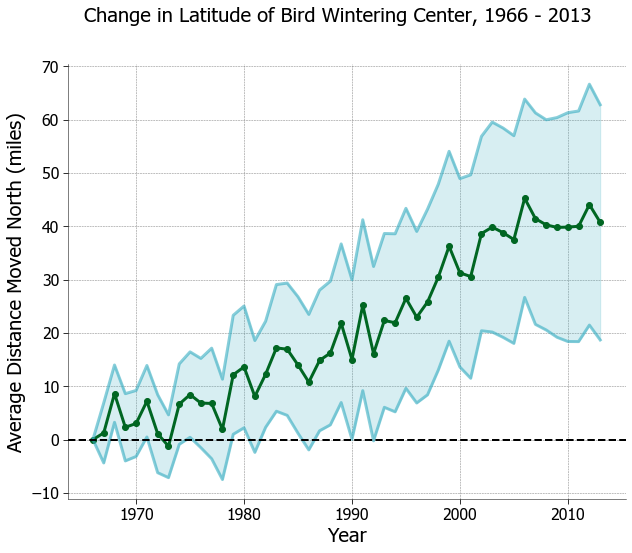

In [29]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Change in Latitude of Bird Wintering Center, 1966 - 2013', fontsize=title_size)


#--------------------------------this part has been updated

# Main line.
plt.plot(bird_range_avg.index, 
         bird_range_avg['mean distance (miles)'], 
         lw=3, marker ='o')

# Upper error range.
plt.plot(bird_range_avg.index, 
         bird_range_avg['upper confidence (miles)'], 
         lw=3, 
         alpha=0.6, 
         color='#39AEC2')

# Lower error range.
plt.plot(bird_range_avg.index, 
         bird_range_avg['lower confidence (miles)'], 
         lw=3, 
         alpha=0.6, 
         color='#39AEC2')

# Fill in region between the two boundary lines, 
# notice how it's not the difference like in the 
# error bars? Also, the alpha command addition?
plt.fill_between(bird_range_avg.index,
                 bird_range_avg['lower confidence (miles)'], 
                 bird_range_avg['upper confidence (miles)'], 
                 alpha=0.2,
                 color='#39AEC2')
#--------------------------------



plt.ylabel('Average Distance Moved North (miles)', fontsize=ax_lbl_size)
plt.xlabel('Year', fontsize=ax_lbl_size)

plt.xticks(fontsize=tick_lbl_size) #make the xaxis labels larger
plt.yticks(fontsize=tick_lbl_size) #make the yaxis labels larger
plt.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

plt.grid(color='gray', linestyle='dashed') #add a grid so it's easier to tell if at zero

### Let's discuss. 

What do we think about this one? Easier to see the error? On your own after class try uncommenting the other two plotting lines in the previous cell. Turn on and off the boundary lines. Do you like it better with those on or off?

## Part 4 - Plotting Multi-Plots with Datetime

Remember all those datasets we imported? Wasn't one of them the temperature changes with month in the lower 48 states? We know the bird count occured between December and January. Maybe it would be informative to plot both of these on the same page (but not the same plot because messy messy plots + confusing).

In the section below we learn about subplotting. 

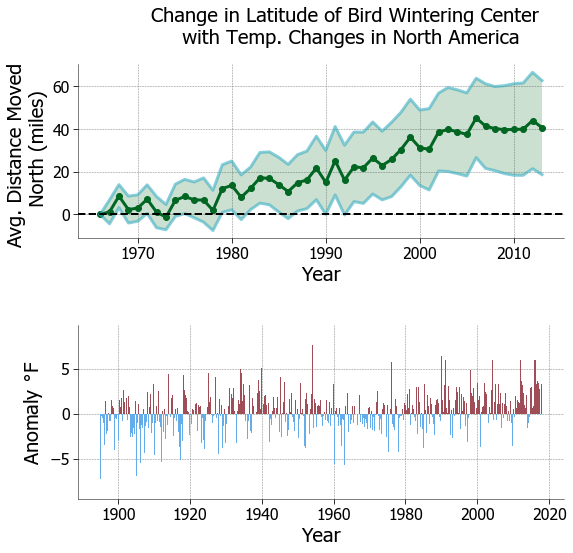

In [30]:
fig = plt.figure(figsize=(10, 8))

# Added newline character to make multilevel title.
fig.suptitle('Change in Latitude of Bird Wintering Center \n with Temp. Changes'+
             ' in North America', fontsize=title_size)

#--------Check out the new format....now we have axes objects
gs = plt.GridSpec(2, 1, hspace=0.5, wspace=0.0, right=0.8)

ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])

# Main line.
ax1.plot(bird_range_avg.index,
         bird_range_avg['mean distance (miles)'],    
         lw=3, marker='o')


# Upper bound.
ax1.plot(bird_range_avg.index, 
         bird_range_avg['upper confidence (miles)'], 
         lw=3,
         alpha=0.6,
         color='#39AEC2')

# Lower bound.
ax1.plot(bird_range_avg.index,
         bird_range_avg['lower confidence (miles)'], 
         lw=3,
         alpha=0.6,
         color = '#39AEC2')


# Notice how our axis now can each have their own labels and how the command is different?
ax1.set_ylabel('Avg. Distance Moved \n North (miles)', fontsize=ax_lbl_size)
ax1.set_xlabel('Year', fontsize=ax_lbl_size)

ax1.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

ax1.fill_between(bird_range_avg.index.to_pydatetime(), 
                 bird_range_avg['lower confidence (miles)'], 
                 bird_range_avg['upper confidence (miles)'], 
                 alpha=0.2)

ax1.grid(color='gray', linestyle='dashed')
ax1.tick_params(labelsize=tick_lbl_size) #make the tick labels


# Now let's add something to the second axes. 

# Remember what we did before with the colors? We are doing that again here.
temp_var_us['Colors'] = '#64ACEA'
boolean_index = temp_var_us['Anomaly'] > 0
temp_var_us.loc[boolean_index, 'Colors']  = '#9F4E58' 


# Set width to arbitray 30 for illustration purposes - 
ax2.bar(temp_var_us.index,
        temp_var_us['Anomaly'],
        width=30,
        align='edge', 
        color=temp_var_us['Colors'])

ax2.set_ylabel('Anomaly $\degree$F', fontsize=ax_lbl_size)
ax2.set_xlabel('Year', fontsize=ax_lbl_size)

ax2.grid(color='gray', linestyle='dashed')

ax2.tick_params(labelsize=tick_lbl_size)
#-----------------------------------------


### Let's discuss. 

What are some immediate issues with this???



----


'

''

'''

''''

'''

''

'

#### Next plot - shared axis and with same range and subset of anomaly data for only January in year



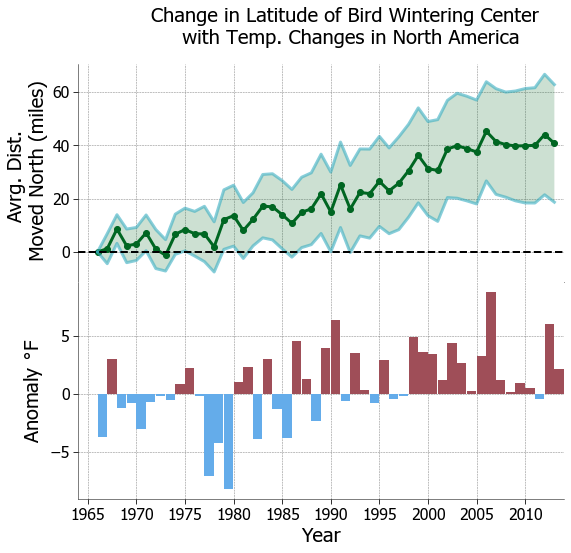

In [31]:


fig = plt.figure(figsize=(10, 8))

# Note, the line continuation operator is the backslash.
fig_title = 'Change in Latitude of Bird Wintering Center \n with Temp. ' \
             + 'Changes in North America'

fig.suptitle(fig_title, fontsize=title_size)

#-----------------------------------------CHANGE REDUCED hspace to 0
gs = plt.GridSpec(2, 1, hspace=0.0, wspace=0.0, right = 0.8)
#-----------------------------------------
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])

# Main line.
ax1.plot(bird_range_avg.index,
         bird_range_avg['mean distance (miles)'],    
         lw=3,
         marker='o')


ax1.plot(bird_range_avg.index,
         bird_range_avg['upper confidence (miles)'], 
         lw=3, 
         alpha=0.6,
         color = '#39AEC2')


ax1.plot(bird_range_avg.index,
         bird_range_avg['lower confidence (miles)'], 
         lw=3, 
         alpha=0.6, 
         color='#39AEC2')


ax1.set_ylabel('Avrg. Dist. \n Moved North (miles)', fontsize=ax_lbl_size)

ax1.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

ax1.fill_between(bird_range_avg.index.to_pydatetime(), 
                 bird_range_avg['lower confidence (miles)'], 
                 bird_range_avg['upper confidence (miles)'], 
                 alpha=0.2)

ax1.grid(color='gray', linestyle='dashed')
ax1.tick_params(labelsize=tick_lbl_size) #make the tick labels


# Now let's add to plot two - remember before how we had a super long date axis?
# Well now we are sharing the axis...how about we do just the same date range?

# Remember how we spent so long on the datetime axis? Our bird data has been set to
# dates of January within the year collected, we know that the data was collected in 
# December/January so we can use .loc with that index?

# Check out the following with indexing - see how we are using the bird_range_avg.index 
# to only get the index for January within the active years?

#---------------------------------------------------CHANGE INDEXING
# Width in this case appears to be normalized to days
ax2.bar(temp_var_us.loc[bird_range_avg.index, :].index, 
        temp_var_us.loc[bird_range_avg.index, 'Anomaly'], 
        width=350,
        align='edge',
        color=temp_var_us.loc[bird_range_avg.index, 'Colors'])
#---------------------------------------------------

ax2.set_ylabel('Anomaly $\degree$F', fontsize=ax_lbl_size)
ax2.set_xlabel('Year', fontsize=ax_lbl_size)

ax2.grid(color='gray', linestyle='dashed')

ax2.tick_params(labelsize=tick_lbl_size)


#IMPORTANT!!!!
#CHANGE------------------------------------
#when doing multi-panel plots with hidden axis, make sure to ALWYS set the limits of the 
#axis for all axis so that the plots don't un-sync - try switching out these 
#datetime objects for other dates can be misleading.

ax1.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2014, 1, 1)])
ax2.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2014, 1, 1)])


# Note - if the axis on the upper plot starts to poke out - you can turn this off
# with the following command
ax1.set_xticklabels([]);
#-----------------------------------------

### Summary of Final Section 4 Plot:

This is a simple multiplot. In future labs we will learn how to subset the axis to skip every other year, and legend placement. For now though sometimes it's useful to add another plot but NOT have the same axis. In this case let's use that third dataset - the main changes in the following function will be to add another plot but of a different dataset, rather than time series we will use the species data we loaded in above. 

## Part 5 - Plotting Multiplots with Different Types of Data (Time Series etc)

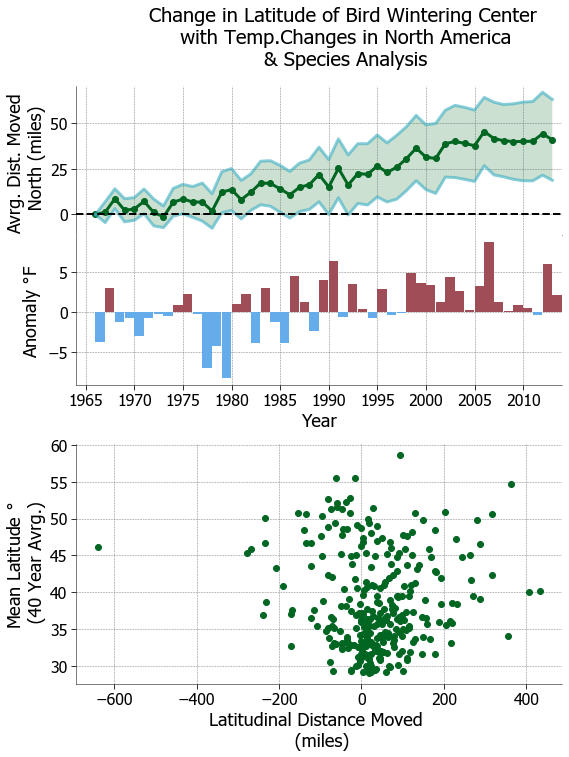

In [32]:
fig = plt.figure(figsize=(10, 11))

fig.suptitle('Change in Latitude of Bird Wintering Center \n with Temp.'+ 
             'Changes in North America \n' +
             '& Species Analysis', fontsize=title_size)

#-----------------------------------------CHANGE TWO GRIDSPACE

# Created two grids - one that divides into quarters and one by halfs.
# Notice the different hspace.
gs_upper = plt.GridSpec(4, 1, hspace=0.0, wspace=0.0, right=0.8)
gs_lower = plt.GridSpec(2, 1, hspace=0.5, wspace=0.0, right=0.8)

# Creating ax1 and ax2 for upper plots.
ax1 = fig.add_subplot(gs_upper[0,:])
ax2 = fig.add_subplot(gs_upper[1,:])

# Creating ax3 for lower plot.
ax3 = fig.add_subplot(gs_lower[1,:])
#-------------------------------------------

# This is all the same as the above plot again
ax1.plot(bird_range_avg.index,
         bird_range_avg['mean distance (miles)'],    
         lw=3,
         marker='o')

ax1.plot(bird_range_avg.index,
         bird_range_avg['upper confidence (miles)'], 
         lw=3, 
         alpha=0.6,
         color='#39AEC2')

ax1.plot(bird_range_avg.index,
         bird_range_avg['lower confidence (miles)'], 
         lw=3,
         alpha=0.6,
         color='#39AEC2')



ax1.set_ylabel('Avrg. Dist. Moved \n North (miles)', fontsize=ax_lbl_size-2)

ax1.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

ax1.fill_between(bird_range_avg.index,
                 bird_range_avg['lower confidence (miles)'], 
                 bird_range_avg['upper confidence (miles)'], 
                 alpha=0.2)

ax1.grid(color='gray', linestyle='dashed')
ax1.tick_params(labelsize=tick_lbl_size)


ax2.bar(temp_var_us.loc[bird_range_avg.index, :].index, 
        temp_var_us.loc[bird_range_avg.index, 'Anomaly'], 
        width=350,
        align='edge',
        color=temp_var_us.loc[bird_range_avg.index, 'Colors'])

ax2.set_ylabel('Anomaly $\degree$F', fontsize=ax_lbl_size-2)
ax2.set_xlabel('Year', fontsize=ax_lbl_size-2)

ax2.grid(color='gray', linestyle='dashed')

ax2.tick_params(labelsize=tick_lbl_size)


#IMPORTANT!!!!
# When doing multiplots with hidden axis MAKE SURE to always set the limits of the axis for
# all axis so that the plots don't un-sync - try switching out these datetime objects for other dates
# can be misleading.
ax1.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2014, 1, 1)])
ax2.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2014, 1, 1)])


# Note - if the axis on the upper plot starts to poke out - you can turn this off
# with the following command:
ax1.set_xticklabels([])


#AND NOW for the third axis

#---------------ADDED
ax3.scatter(bird_species['Latitudinal distance moved (miles)'], 
            bird_species['Mean latitude (40-year ave from regression)'])

ax3.set_xlabel('Latitudinal Distance Moved \n (miles)', fontsize=ax_lbl_size-2)
ax3.set_ylabel('Mean Latitude $\degree$ \n (40 Year Avrg.)', fontsize=ax_lbl_size-2)

ax3.grid(color='gray', linestyle='dashed')
ax3.tick_params(labelsize=tick_lbl_size) 
#-----------------

### Let's make that last plot a bit more approachable - 

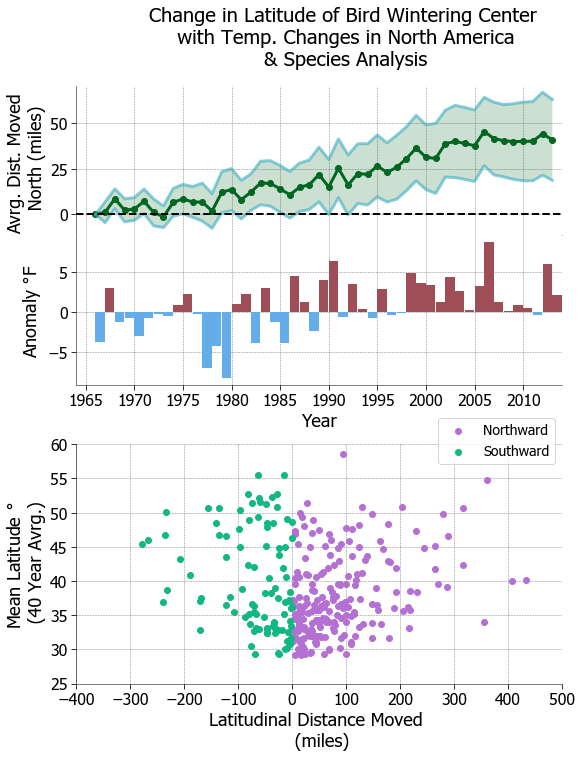

In [33]:
fig = plt.figure(figsize=(10, 11))

fig.suptitle('Change in Latitude of Bird Wintering Center \n with Temp. Changes in North America \n' +
              '& Species Analysis', fontsize=title_size)


# Created two grids - one that divides into quarters and one by halfs;
# notice the different hspace.
gs_upper = plt.GridSpec(4, 1, hspace=0.0, wspace=0.0, right=0.8)
gs_lower = plt.GridSpec(2, 1, hspace=0.5, wspace=0.0, right=0.8)

# Creating ax1 and ax2 for upper plots.
ax1 = fig.add_subplot(gs_upper[0,:])
ax2 = fig.add_subplot(gs_upper[1,:])

# Creating ax3 for lower plot.
ax3 = fig.add_subplot(gs_lower[1,:])

# This is all the same as the above plot again.
ax1.plot(bird_range_avg.index,
         bird_range_avg['mean distance (miles)'],    
         lw=3, 
         marker='o')

ax1.plot(bird_range_avg.index,
         bird_range_avg['upper confidence (miles)'], 
         lw=3, 
         alpha=0.6, 
         color='#39AEC2')

ax1.plot(bird_range_avg.index,
         bird_range_avg['lower confidence (miles)'], 
         lw=3, 
         alpha=0.6, 
         color='#39AEC2')


# Notice how our axis now can each have their own labels and how the command is different?
ax1.set_ylabel('Avrg. Dist. Moved \n North (miles)', fontsize=ax_lbl_size-2)


ax1.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

ax1.fill_between(bird_range_avg.index.to_pydatetime(), 
                 bird_range_avg['lower confidence (miles)'], 
                 bird_range_avg['upper confidence (miles)'], 
                 alpha=0.2)

ax1.grid(color='gray', linestyle='dashed')
ax1.tick_params(labelsize=tick_lbl_size) #make the tick labels


# Adding second plot:
ax2.bar(temp_var_us.loc[bird_range_avg.index, :].index, 
        temp_var_us.loc[bird_range_avg.index, 'Anomaly'], 
        width=350,
        align='edge',
        color=temp_var_us.loc[bird_range_avg.index, 'Colors'])

ax2.set_ylabel('Anomaly $\degree$F', fontsize=ax_lbl_size-2)
ax2.set_xlabel('Year', fontsize=ax_lbl_size-2)

ax2.grid(color='gray', linestyle='dashed')

ax2.tick_params(labelsize=tick_lbl_size)


#IMPORTANT!!!!
#when doing multiplots with hidden axis MAKE SURE to always set the limits of the axis for
#all axis so that the plots don't un-sync - try switching out these datetime objects for other dates
#can be misleading
ax1.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2014, 1, 1)])
ax2.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2014, 1, 1)])


#note - if the axis on the upper plot starts to poke out - you can turn this off
#with the following command
ax1.tick_params(bottom=False, labelbottom=False)


# You could also use:
#ax1.set_xticklabels([]);


#AND NOW for the third plot:

#---------------ADDED COLORS AND LEGEND with indexing

#the label command syncs to the legend

indexN = (bird_species['Lat. direction moved'] == 'N')

ax3.scatter(bird_species.loc[indexN, 'Latitudinal distance moved (miles)'], 
            bird_species.loc[indexN, 'Mean latitude (40-year ave from regression)'], 
            color='#B570D4', 
            label='Northward')

ax3.scatter(bird_species.loc[~indexN, 'Latitudinal distance moved (miles)'], 
            bird_species.loc[~indexN, 'Mean latitude (40-year ave from regression)'], 
            color='#12B884',
            label='Southward')

ax3.set_xlabel('Latitudinal Distance Moved \n (miles)', fontsize=ax_lbl_size-2)
ax3.set_ylabel('Mean Latitude $\degree$ \n (40 Year Avrg.)', fontsize=ax_lbl_size-2)

# Note how we set the limits
ax3.set_xlim([-400, 500])
ax3.set_ylim([25, 60])

# ---------------------
# SETTING UP THE LEGEND:

# More info here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

#bbox sets location
#prop sets fontsize

# Make sure to never overplot legend on top of data!

# x and y in inches - requires labels in the plotting
# commands to label 
ax3.legend(bbox_to_anchor=(1, 1.14), prop={'size':14})
# You can also use commands such as "upper right" to make 
# a legend placement.

#-----------------
ax3.grid(color='gray', linestyle='dashed')
ax3.tick_params(labelsize=tick_lbl_size) 

# SUMMARY

From this lab you have learned the basics of subplots, scatterplots, datetime structures, and legends. 

We have also learned about more about access a pandas data frame through boolean indexing and through normal indexing. 

Homework: 
        - Please complete Assignment 2 on Canvas - 
        due in 1 week on Wednesday, January 29. 
         

In the next few weeks we will start doing more data manipulation and statistics in lab building off the Monday lectures.


Some final notes - there are many ways to subplot using the matplotlib library. Through this class, we will try to demonstrate a popular version.  

## Additional Material

### **Python data structures**

In Lab 1, we saw how to store data through external packages using Numpy Arrays and Pandas DataFrame objects. There are several built-in (available without importing any packages) data structures within Python that we may find useful. We will highlight a few of these below. 

**Tuples**

A tuple in Python is an Immutable, ordered collection of objects. The objects do not need to have the same type.

*Immutable* means that once it is created, it cannot be modified.

*Ordered* means that the order of the objects inside the tuple do not change (very useful for indexing!).

You create a tuple but using open and close parenthesis, `(`, `)`, by typing a comma separated list; or by using the keyword `tuple`. They can contain one or more objects.

Let's look at some examples.

In [34]:
t1 = (1, 2, 3)
print(type(t1))
print(t1)

<class 'tuple'>
(1, 2, 3)


In [35]:
# These are all valid ways of creating a tuple
t2 = (4.0, 5)  # notice the mixed types here, a float and an int
t3 = (6,)
t4 = 7,
t5 = 8, 9, 10, 'eleven' #here we use ints, and a string type object

# We can even create a tuple of tuples:
t_all = (t1, t2, t3, t4, t5)

# And loop over the objects inside; 
# Note the len() function returns the number of objects contained in the tuple.
for t in t_all:
    print(type(t), len(t))
    

# And we can loop through all of the objects inside of our tuples.
for t in t_all:
    for n in t:
        print(n)
    

<class 'tuple'> 3
<class 'tuple'> 2
<class 'tuple'> 1
<class 'tuple'> 1
<class 'tuple'> 4
1
2
3
4.0
5
6
7
8
9
10
eleven


In [36]:
# We can index into the tuple to retrieve any of the objects that we want:
# Remember Python is '0' based indexing!
print(t1[1])

2


We can index into deeper layers of our tuple also. Let's say we wanted the `4.0` from `t_all`. The first `[]` indexes into `t_all` and the the second `[]` indexes into whatever object we have there. 

For example, `4.0` is part of `t2`, which is in the first index position of `t_all`.

In [37]:
target = t_all[1][0]
print(target)

4.0


How would you extract the `'eleven'` from `t_all`? 

Type your answer in cell below:

In [41]:
eleven = t_all[4][3]

print(eleven)

eleven


In [42]:
# Tuples can be concatenated ... combined using + operator:
t_all_concat = t1 + t2 + t3 + t4 + t5


# How does this compare to how we combined our tuples earlier?
print(t_all_concat)
print(t_all)
print(len(t_all_concat))
print(len(t_all))

# Notice how t_all is a tuple of tuples, and t_all_concat is a single tuple?

(1, 2, 3, 4.0, 5, 6, 7, 8, 9, 10, 'eleven')
((1, 2, 3), (4.0, 5), (6,), (7,), (8, 9, 10, 'eleven'))
11
5


In [43]:
# Be we cannot subtract tuples...
# Try running this cell:
t_all_concat - t1

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

Subtraction (or any type of deletion does not work with tuples, because they are *immutable*, that is, once they are created, we cannot change them. So once we defined `t_all_concat`, we cannot change it in any way. Because of this, tuples have limited functionality, however, they have advantages too, and you will see them often in Python code.

For a container that allows mutability, we turn to the Python `list` object.

**Python Lists**

Similar to tuples, lists are ordered, can contain multiple object types, and can be concatenated. Additionally, lists are *mutable*, so that once they are created, they can be modified. We can insert, remove, or modify it's contents. 

We construct a list by using brackets `[`, `]` or by using the keyword `list`. Note that we can turn a `list` into a `tuple` or a `tuple` into a `list`.

Let's see some examples.

In [44]:
# This creates a list
a1 = [1, 2, 3]
type(a1)

list

In [45]:
# Some additional constructors:
a2 = [4.0, 5]
a3 = [6,]
a4 = list(t4)  # see how we are converting a tuple to a list here
a5 = list((8, 9, 10, 'eleven'))


# We can have a list of lists:
a_all = (a1, a2, a3, a4, a5)


# Like with tuples, we can loop over the objects inside a list; 
# Note the len() function returns the number of objects contained in the tuple.
for a in a_all:
    print(type(a), len(a))
    

# And we can loop through all of the objects inside of our tuples.
for t in t_all:
    for n in t:
        print(n)
   

<class 'list'> 3
<class 'list'> 2
<class 'list'> 1
<class 'list'> 1
<class 'list'> 4
1
2
3
4.0
5
6
7
8
9
10
eleven


In [46]:
# Like with tuples, we can index into a list using the same syntax
eleven = a_all[-1][-1]

eleven

'eleven'

There are several ways to modify a `list` object. Here are a few...

In [47]:
# See how a1 has changed after this.. which item did it "pop"?
# Use pop? to see how to remove different items.
i = a1.pop()
print(i)
print(a1)

3
[1, 2]


In [48]:
# What if we want to place something at the end of a list?
a1.append(i)
print(a1)

[1, 2, 3]


There are also many more methods available for `lists`; here is a full list: `append clear copy count extend index insert pop remove reverse`. 

Use `?` to explore the syntax for all and what they do.

We will not be working very much with lists directly in this course, but you should be familiar with them and their associated methods. 

**Python Dictionaries**

A `dictionary` in Python is an unordered mapping between two sets of objects using `key: value` pairs. Unordered means that we cannot index into them like we can with lists or tuples. Instead, we index into them using the `key`. They are mutable and can contain many different types of objects. Keys must be immutable types, typically we use numeric types like `ints` or `floats`; `strings` are also commonly used as keys. Value objects can be of any type. 

We construct a dictionary using curly braces `{`, `}`, or by using the keyword `dict`.

They are a very common data structure in Python and you will see them often.

Here a few examples of their usage.

In [49]:
d1 = {'a': 1, 'b': 2, 'c':3}
print(type(d1))
print(d1)

<class 'dict'>
{'a': 1, 'b': 2, 'c': 3}


In [50]:
# To access the values within a dictionary, we must use the key.
print(d1['b'])

2


In [51]:
# Like our other containers, we can have dictionaries of dictionaries, lists, tuples, and can make them
# however deep we would like.

# There are many valid constructors ... just pick your favorite!

d2 = dict(d=4.0, e='fun', f=t3)

# Here we use the zip function. Can you guess what it does? 
# Use '?' on zip to confirm your guess.
d3 = dict(zip(t5, [4, 2, 1.0, 11] ))

d4 = dict([(t1, a1), ('d3', d3)])

d5 = dict(
     {
      'd1': d1,
      'd2': d2, 
      'd4': d4
     }
     )


print(d5)

{'d1': {'a': 1, 'b': 2, 'c': 3}, 'd2': {'d': 4.0, 'e': 'fun', 'f': (6,)}, 'd4': {(1, 2, 3): [1, 2, 3], 'd3': {8: 4, 9: 2, 10: 1.0, 'eleven': 11}}}


When we print our dictionary, every item in our combined dictionary gets printed. Obviously we would need to have carefully named keys to make sense of any of this and get the information out that we need. For example, can you extract the `value` that is mapped to the  `'eleven'` `key`?

In [58]:
# Replace ?? with your keys to get the number 11 (not the string) from the d5 dictionary
# Hint: it is three layers deep

ans = d5['d4']['d3']['eleven']

# If correct, will print: 11
print(ans)

11


In [59]:
# We can modify the values of keys within dictionaries too
d1['a'] = 'new answer'
print(d1)

{'a': 'new answer', 'b': 2, 'c': 3}


In addition, there are many methods associated with dictionaries, and you should explore them!

Even though the items in a dictionary are unordered, we can iterate through them.

In [60]:
for key in d1.keys():
    print(d1[key])  # This prints the value that is mapped to each key in the dictionary d1


new answer
2
3


We will use dictionaries frequently, and we will have more opportunities to practice using them.